In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload


In [2]:
import lib.Layers as Layer
import numpy as np
import lib.loss_functions as Loss
import lib.Activations as activations
from lib.DataLoader import DataLoader
import lib.helper as processing
import lib.Sequential as Sequence

import matplotlib.pyplot as plt

#### Step 1 : Processing the Data
This folllowing code downloads the MNIST data, processes it , splits it into train_test splits returns data that is ready to be fed to neural network
- Arguments :<br>
	- "**download**" : False - if data is already present <br>
    - "**download**" : True - if data needs to be downloaded <br>
    - "**ratio**" : train_test split ratio

            

In [3]:
#Downloading the data, processing them and splitting to train_test sets 
X_train,X_test,y_train,y_test = processing.process_data(download=False,ratio=0.8)

#One hot encoding of the categorical test data output
y_train_new = np.eye(10)[((y_train))][0].T
y_test_new = (np.eye(10)[(y_test)])[0].T

data_dict = {'X_train':X_train,'y_train_new':y_train_new,'X_test':X_test,'y_test': y_test}

#### Step 2 :  Defining the network architecture
This folllowing defines the neural network architecture. First of all, the Sequential() object of class Sequence is defined, whose main purpose is to allow us to define network objects that store the different layers of the entire architecture. We then use the construct network method to define the architecture with following arguments:
- Arguments :<br>
	- **input_units**               : Number of input dimensions
    - **hidden_units**            :  A list of hidden  layers with their corresponding unit size
    - **output_units**             : Number of output units
    - **activation_function**  : Activation function to be used, derived from the Activations() class


            

In [4]:
#Defining the network architecture 
network = Sequence.Sequential()
hidden_units = [256,64]
output_units = 10
activation_unit = activations.Sigmoid()
learning_rate = 0.01
weight_initialization = 'random'

network_sequence = network.construct_network(X_train.shape[0],hidden_units,output_units,activation_unit,learning_rate,weight_initialization)


#### Step 3 : Training the network 
This step usees processing.main function to run the training loops for corresponding epochs, gradient are set to zero at the start of each epochs.
- Arguments :<br>
    - **network**               :  Sequence.Sequential() network architecture from step 2    - **loss_function**            :  Loss function to be used (eg. Loss.CrossEntropy() or Loss.HingeLoss())
    - **data_dict**             : Data object from Step 1
    - **batch_size**  : Batch size for Mini Batch Gradient descent
    - **epoch_range**  : Total Epochs      

In [5]:
batch_ = 512
epochs_ = 100
loss_unit = Loss.CrossEntropy()
learning_rate = 0.01

train_accuracies, test_accuracies, loss_measured = processing.main(network,loss_unit,data_dict,batch_,epochs_)


Iterating Epoch 1/100,   Average Epoch Loss  : 4.18779,Training Accuracy : 0.154161, Validation Accuracy : 0.236429  
Iterating Epoch 2/100,   Average Epoch Loss  : 3.374581,Training Accuracy : 0.316909, Validation Accuracy : 0.388357  
Iterating Epoch 3/100,   Average Epoch Loss  : 2.908295,Training Accuracy : 0.438784, Validation Accuracy : 0.486643  
Iterating Epoch 4/100,   Average Epoch Loss  : 2.597231,Training Accuracy : 0.516442, Validation Accuracy : 0.547071  
Iterating Epoch 5/100,   Average Epoch Loss  : 2.372023,Training Accuracy : 0.566536, Validation Accuracy : 0.590214  
Iterating Epoch 6/100,   Average Epoch Loss  : 2.199766,Training Accuracy : 0.604226, Validation Accuracy : 0.619357  
Iterating Epoch 7/100,   Average Epoch Loss  : 2.062765,Training Accuracy : 0.632966, Validation Accuracy : 0.641071  
Iterating Epoch 8/100,   Average Epoch Loss  : 1.950595,Training Accuracy : 0.655694, Validation Accuracy : 0.662429  
Iterating Epoch 9/100,   Average Epoch Loss  : 1.

Iterating Epoch 70/100,   Average Epoch Loss  : 0.840553,Training Accuracy : 0.840601, Validation Accuracy : 0.829286  
Iterating Epoch 71/100,   Average Epoch Loss  : 0.836545,Training Accuracy : 0.840956, Validation Accuracy : 0.83  
Iterating Epoch 72/100,   Average Epoch Loss  : 0.832621,Training Accuracy : 0.841471, Validation Accuracy : 0.8305  
Iterating Epoch 73/100,   Average Epoch Loss  : 0.828779,Training Accuracy : 0.841969, Validation Accuracy : 0.831429  
Iterating Epoch 74/100,   Average Epoch Loss  : 0.825017,Training Accuracy : 0.842359, Validation Accuracy : 0.833071  
Iterating Epoch 75/100,   Average Epoch Loss  : 0.82133,Training Accuracy : 0.84288, Validation Accuracy : 0.833714  
Iterating Epoch 76/100,   Average Epoch Loss  : 0.817718,Training Accuracy : 0.843513, Validation Accuracy : 0.834429  
Iterating Epoch 77/100,   Average Epoch Loss  : 0.814177,Training Accuracy : 0.844241, Validation Accuracy : 0.834929  
Iterating Epoch 78/100,   Average Epoch Loss  : 

#### Step 4 : Visualizing the loss and accuracies

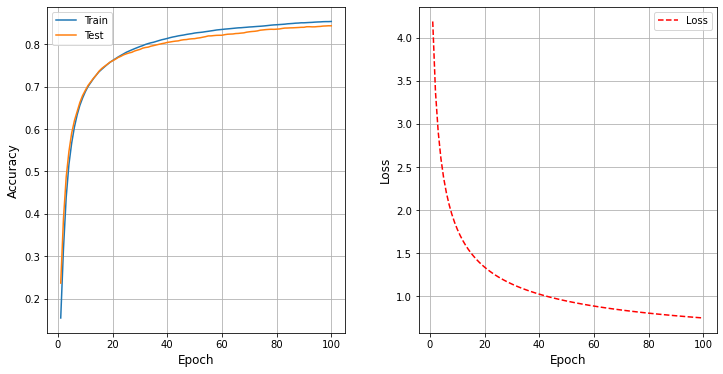

In [6]:
processing._plot(train_accuracies,test_accuracies,loss_measured)


## Testing Network on a new input

In [7]:
data_sample_X = X_test[1310].reshape(-1,1)
actual_y = (y_test.T)[1310]

model_output = network.forward(data_sample_X)[-1]

print(f'Actual output is {np.argmax(model_output)}, predicted output is {actual_y}')

Actual output is 3, predicted output is [3]


###  Neural Network 2 : 3 hidden layers

In [8]:
batch_ = 512
epochs_ = 100
learning_rate = 0.1
weight_initialization = 'random'

activation_unit = activations.Sigmoid()
loss_unit = Loss.CrossEntropy()

hidden_units =[128,256,64]
output_units = 10

#Defining the network architecture 
network = Sequence.Sequential()
network_sequence = network.construct_network(X_train.shape[0],hidden_units,output_units,activation_unit,learning_rate,weight_initialization)


train_accuracies, test_accuracies, loss_measured = processing.main(network,loss_unit,data_dict,batch_,epochs_)


Iterating Epoch 1/100,   Average Epoch Loss  : 1.474062,Training Accuracy : 0.585671, Validation Accuracy : 0.746714  
Iterating Epoch 2/100,   Average Epoch Loss  : 1.104904,Training Accuracy : 0.77761, Validation Accuracy : 0.8005  
Iterating Epoch 3/100,   Average Epoch Loss  : 0.947593,Training Accuracy : 0.814595, Validation Accuracy : 0.824  
Iterating Epoch 4/100,   Average Epoch Loss  : 0.855421,Training Accuracy : 0.83373, Validation Accuracy : 0.834714  
Iterating Epoch 5/100,   Average Epoch Loss  : 0.793687,Training Accuracy : 0.84478, Validation Accuracy : 0.845571  
Iterating Epoch 6/100,   Average Epoch Loss  : 0.748993,Training Accuracy : 0.852036, Validation Accuracy : 0.852571  
Iterating Epoch 7/100,   Average Epoch Loss  : 0.714562,Training Accuracy : 0.856706, Validation Accuracy : 0.8565  
Iterating Epoch 8/100,   Average Epoch Loss  : 0.686848,Training Accuracy : 0.86147, Validation Accuracy : 0.860214  
Iterating Epoch 9/100,   Average Epoch Loss  : 0.663919,Tra

Iterating Epoch 70/100,   Average Epoch Loss  : 0.469685,Training Accuracy : 0.869525, Validation Accuracy : 0.867214  
Iterating Epoch 71/100,   Average Epoch Loss  : 0.469329,Training Accuracy : 0.871626, Validation Accuracy : 0.866286  
Iterating Epoch 72/100,   Average Epoch Loss  : 0.468947,Training Accuracy : 0.871697, Validation Accuracy : 0.867786  
Iterating Epoch 73/100,   Average Epoch Loss  : 0.468555,Training Accuracy : 0.870378, Validation Accuracy : 0.8655  
Iterating Epoch 74/100,   Average Epoch Loss  : 0.468176,Training Accuracy : 0.870289, Validation Accuracy : 0.863286  
Iterating Epoch 75/100,   Average Epoch Loss  : 0.467764,Training Accuracy : 0.87065, Validation Accuracy : 0.8635  
Iterating Epoch 76/100,   Average Epoch Loss  : 0.467399,Training Accuracy : 0.86994, Validation Accuracy : 0.865571  
Iterating Epoch 77/100,   Average Epoch Loss  : 0.467069,Training Accuracy : 0.86994, Validation Accuracy : 0.865286  
Iterating Epoch 78/100,   Average Epoch Loss  :

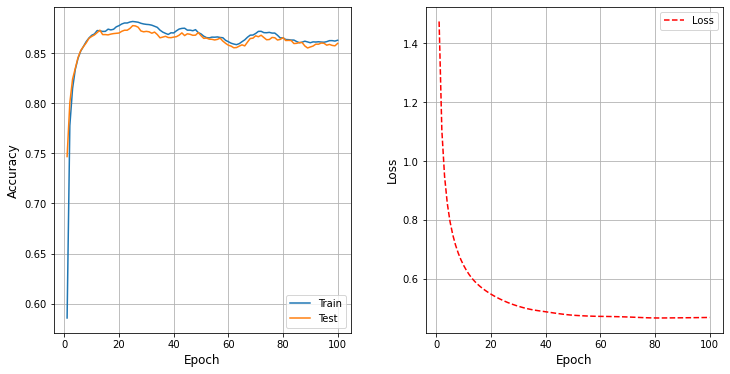

In [9]:
processing._plot(train_accuracies,test_accuracies,loss_measured)
